In [131]:
#任务
# 1、基于chip test.csv数据，建立逻辑回归模型(二阶边界)，评估模型表现;
# 2、以函数的方式求解边界曲线
# 3、描绘出完整的决策边界曲线

In [132]:
#读取数据
import pandas as pd
import numpy as np
data = pd.read_csv("chip_test.csv")
data.head(5)

,test1,test2,pass
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,0.183760,0.93348,0


In [133]:
#可视化数据(准备)
mask = data.loc[:,'pass']==1
mask


0       True
1       True
2       True
3       True
4      False
       ...  
113    False
114    False
115    False
116    False
117    False
Name: pass, Length: 118, dtype: bool

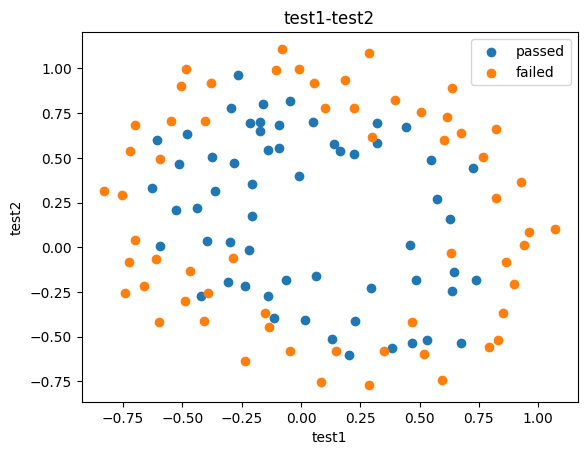

In [134]:
#可视化数据
%matplotlib inline
from matplotlib import pyplot as plt
fig = plt.figure()

#通过的点
passed = plt.scatter(data.loc[:,'test1'][mask],data.loc[:,'test2'][mask])

#没通过的点
failed = plt.scatter(data.loc[:,'test1'][~mask],data.loc[:,'test2'][~mask])
plt.title('test1-test2')
plt.xlabel('test1')
plt.ylabel('test2')
plt.legend((passed,failed),('passed','failed'))
plt.show()

从图中可以看出数据非常的复杂，内部一个椭圆，外部一个椭圆，如果用一阶边界，怎么也不会找到一个好的拟合，因此我们 直接选择使用二阶边界去拟合数据


In [135]:
#定义X,y(生成新的模型)
X = data.drop(['pass'],axis=1)
y = data.loc[:,'pass']
X1 = data.loc[:,'test1']
X2 = data.loc[:,'test2']

#创建新的数据
X1_2 = X1*X1
X2_2 = X2*X2
X1_X2 = X1*X2
X_new = {'X1':X1,'X2':X2,'X1_2':X1_2,'X2_2':X2_2,'X1_X2':X1_X2}
X_new = pd.DataFrame(X_new)
print(X_new)
y

           X1        X2      X1_2      X2_2     X1_X2
0    0.051267  0.699560  0.002628  0.489384  0.035864
1   -0.092742  0.684940  0.008601  0.469143 -0.063523
2   -0.213710  0.692250  0.045672  0.479210 -0.147941
3   -0.375000  0.502190  0.140625  0.252195 -0.188321
4    0.183760  0.933480  0.033768  0.871385  0.171536
..        ...       ...       ...       ...       ...
113 -0.720620  0.538740  0.519293  0.290241 -0.388227
114 -0.593890  0.494880  0.352705  0.244906 -0.293904
115 -0.484450  0.999270  0.234692  0.998541 -0.484096
116 -0.006336  0.999270  0.000040  0.998541 -0.006332
117  0.632650 -0.030612  0.400246  0.000937 -0.019367

[118 rows x 5 columns]


0      1
1      1
2      1
3      1
4      0
      ..
113    0
114    0
115    0
116    0
117    0
Name: pass, Length: 118, dtype: int64

In [136]:
#构建模型
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()


In [137]:
#数据训练
LR.fit(X_new,y)

LogisticRegression()

In [138]:
#数据预测
y_predict = LR.predict(X_new)

In [139]:
#精确度判断（评估模型的效果）
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y,y_predict)
accuracy

0.8135593220338984

In [140]:
#求解边界
X1_new = X1.sort_values()
# X1_new
theta0 = LR.intercept_
# theta0
theta1,theta2,theta3,theta4,theta5 = LR.coef_[0][0],LR.coef_[0][1],LR.coef_[0][2],LR.coef_[0][3],LR.coef_[0][4]
# print(theta0,theta1,theta2,theta3,theta4,theta5)
a = theta4
b = theta5*X1_new+theta2
c = theta0+theta1*X1_new+theta3*X1_new*X1_new
# print('a',a,'b',b,'c',c)
X2_new_boundary = (-b+np.sqrt(b*b-4*a*c))/(2*a) #不知道为什么就是要加绝对值（abs）

print(X2_new_boundary)

112   NaN
86    NaN
84    NaN
111   NaN
113   NaN
       ..
70    NaN
65    NaN
68    NaN
67    NaN
101   NaN
Name: test1, Length: 118, dtype: float64


D:\download\anaconda3\envs\machine_learning\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


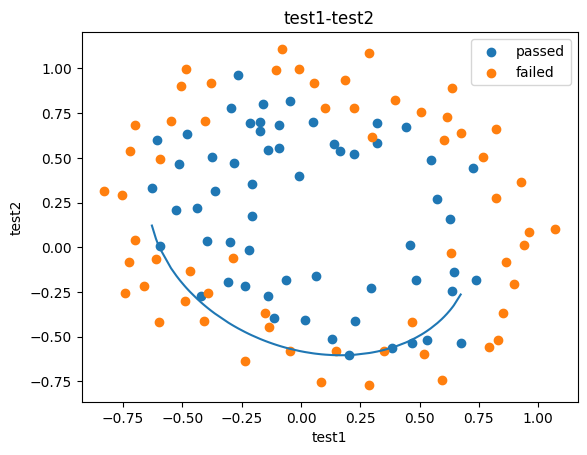

In [141]:
#可视化 (画出一半)
fig2 = plt.figure()

#通过的点
passed = plt.scatter(data.loc[:,'test1'][mask],data.loc[:,'test2'][mask])

#没通过的点
failed = plt.scatter(data.loc[:,'test1'][~mask],data.loc[:,'test2'][~mask])

plt.plot(X1_new,X2_new_boundary)

plt.title('test1-test2')
plt.xlabel('test1')
plt.ylabel('test2')
plt.legend((passed,failed),('passed','failed'))
# plt.show()

In [142]:
#定义新的方法去求解

def f(x):
    a = theta4
    b = theta5*x+theta2
    c = theta0+theta1*x+theta3*x*x
    # print('a',a,'b',b,'c',c)
    X2_new_boundary1 = (-b+np.sqrt(b*b-4*a*c))/(2*a)#不知道为什么就是要加绝对值（abs）
    X2_new_boundary2 = (-b-np.sqrt(b*b-4*a*c))/(2*a) #不知道为什么就是要加绝对值（abs）

    return X2_new_boundary1,X2_new_boundary2


In [143]:
X2_new_boundary1 = []
X2_new_boundary2 = []

for x in X1_new:
    X2_new_boundary1.append(f(x)[0])
    X2_new_boundary2.append(f(x)[1])
# print(X2_new_boundary1,X2_new_boundary2)

C:\Users\pumpkin\AppData\Local\Temp\ipykernel_15844\2671816238.py:8: RuntimeWarning: invalid value encountered in sqrt
  X2_new_boundary1 = (-b+np.sqrt(b*b-4*a*c))/(2*a)#不知道为什么就是要加绝对值（abs）
C:\Users\pumpkin\AppData\Local\Temp\ipykernel_15844\2671816238.py:9: RuntimeWarning: invalid value encountered in sqrt
  X2_new_boundary2 = (-b-np.sqrt(b*b-4*a*c))/(2*a) #不知道为什么就是要加绝对值（abs）


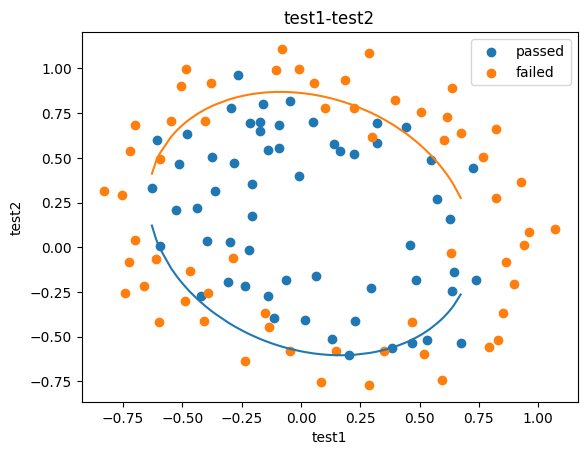

In [144]:
#可视化（画出完整的图像）
fig3 = plt.figure()

#通过的点
passed = plt.scatter(data.loc[:,'test1'][mask],data.loc[:,'test2'][mask])

#没通过的点
failed = plt.scatter(data.loc[:,'test1'][~mask],data.loc[:,'test2'][~mask])

plt.plot(X1_new,X2_new_boundary1)
plt.plot(X1_new,X2_new_boundary2)
plt.title('test1-test2')
plt.xlabel('test1')
plt.ylabel('test2')
plt.legend((passed,failed),('passed','failed'))
plt.show()

能看出画出的图像左右都有缺陷，我们现在需要将这两个缺口给补全

In [145]:
#首先创建X方向的数据集
X1_range = [-0.9+x/10000 for x in range(0,19000)]
X1_range = np.array(X1_range)
X1_range = pd.Series(X1_range)

for x in X1_range:
    X2_new_boundary1.append(f(x)[0])
    X2_new_boundary2.append(f(x)[1])

C:\Users\pumpkin\AppData\Local\Temp\ipykernel_15844\2671816238.py:8: RuntimeWarning: invalid value encountered in sqrt
  X2_new_boundary1 = (-b+np.sqrt(b*b-4*a*c))/(2*a)#不知道为什么就是要加绝对值（abs）
C:\Users\pumpkin\AppData\Local\Temp\ipykernel_15844\2671816238.py:9: RuntimeWarning: invalid value encountered in sqrt
  X2_new_boundary2 = (-b-np.sqrt(b*b-4*a*c))/(2*a) #不知道为什么就是要加绝对值（abs）


In [146]:
# print('type(X1_new)',type(X1_new),'type(X1_range)',type(X1_range))
X11 = X1_range.append(X1_new)
print(X11.shape)

(19118,)


C:\Users\pumpkin\AppData\Local\Temp\ipykernel_15844\3215617315.py:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X11 = X1_range.append(X1_new)


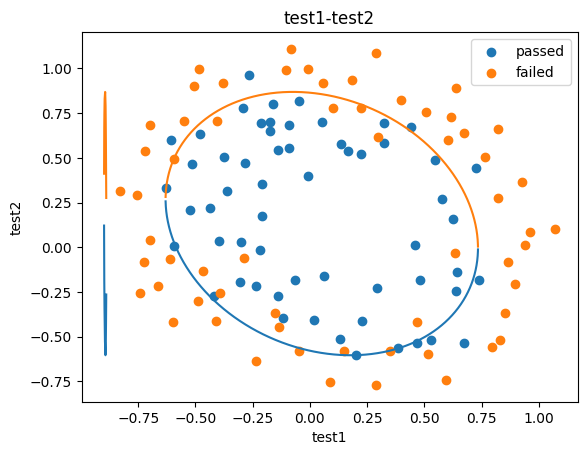

In [147]:
#可视化（画出完整的图像）
fig4 = plt.figure()

#通过的点
passed = plt.scatter(data.loc[:,'test1'][mask],data.loc[:,'test2'][mask])

#没通过的点
failed = plt.scatter(data.loc[:,'test1'][~mask],data.loc[:,'test2'][~mask])

plt.plot(X11,X2_new_boundary1)
plt.plot(X11,X2_new_boundary2)
plt.title('test1-test2')
plt.xlabel('test1')
plt.ylabel('test2')
plt.legend((passed,failed),('passed','failed'))
plt.show()